# Assignment 4 - Unsupervised Learning and More Supervised Learning

## *Allison Young*
Netid:  *ary13*

## 1

### [35 points] Clustering

Clustering can be used to determine structure, assign group membership, and representing data through compression. Here you'll dive deeply into clustering exploring the impact of a number of classifiers on 

**(a)** Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the `blobs` dataset from `scikit-learn` with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. For each case, where is the elbow in the curve? Explain why.

**(b)** Briefly explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering

**(c)** For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performance of each method on each dataset. Which methods work best/worst on each dataset and why?
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

**ANSWER**

### Q1
#### Answer A

Set up Workspace

In [13]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

Create Cluster Datasets

In [14]:
import sklearn
from sklearn.datasets.samples_generator import make_blobs
np.random.seed(26)
two_clust = sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
five_clust = sklearn.datasets.make_blobs(n_samples=100, n_features=5, centers=5, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

print("Clusters created")

Clusters created


#### Two Cluster Dataset

Scatterplot

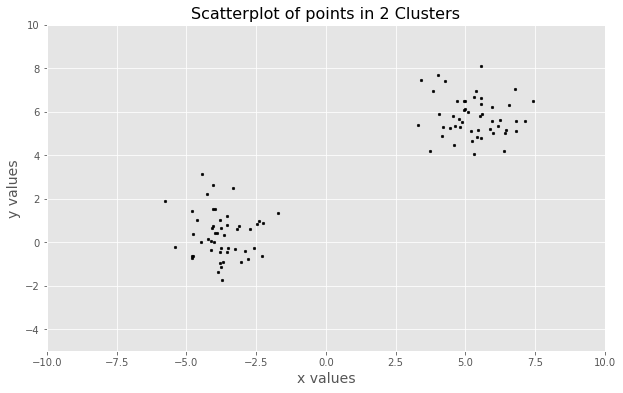

In [16]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#print(len(two_clust))

# Getting the values and plotting it
f1 = two_clust[0]
f2 = two_clust[1]
#print(len(f1), f1[:,0])
#print(len(f2), f2)

X = np.array(list(zip(f1[:,0], f1[:,1])))
plt.scatter(f1[:,0], f1[:,1], c='black', s=7)


plt.xlabel("x values", fontsize=14)
plt.ylabel("y values", fontsize=14)
plt.title("Scatterplot of points in 2 Clusters")
plt.xlim(-10, 10)
plt.ylim(-5, 10)

plt.title("Scatterplot of points in 2 Clusters", fontsize=16)

plt.show()

Euclidean Distance Calcuation Function

In [17]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

Initiate K Centroids

Two Cluster initial Centroids 
 [[5. 3.]
 [4. 5.]]


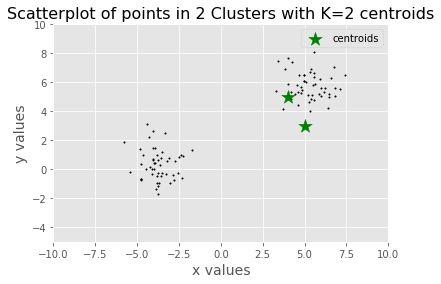

In [23]:
# Number of clusters

k = 2
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-2, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-2, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Two Cluster initial Centroids \n",C)

# Plotting along with the Centroids
plt.scatter(f1[:,0], f1[:,1], c='#050505', s=2)
plt.scatter(C_x, C_y, marker='*', s=200, c='g', label= 'centroids')

plt.xlabel("x values", fontsize=14)
plt.ylabel("y values", fontsize=14)
plt.title("Scatterplot of points in 2 Clusters")
plt.xlim(-10, 10)
plt.ylim(-5, 10)

plt.title("Scatterplot of points in 2 Clusters with K=2 centroids", fontsize=16)

plt.legend()
plt.show()

Repeat Estimate and Mean Steps and Update Centroids until change is 0

In [24]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
print("Two cluster K-means has Converged")

Two cluster K-means has Converged


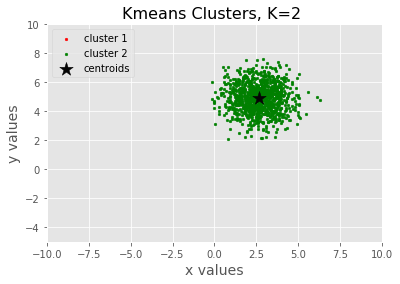

In [25]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i], label= "cluster {}".format(i+1))
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505', label= "centroids")

plt.xlabel("x values", fontsize=14)
plt.ylabel("y values", fontsize=14)
plt.xlim(-10, 10)
plt.ylim(-5, 10)

plt.title("Kmeans Clusters, K=2 ", fontsize=16)

plt.legend()
plt.show()

Unfortunately, I kind of shot myself in the foot with this one by not making a more generalizable function. Therefore, I got stuck on de-bugging and ran out of time to do the elbow curves. I will likely try to finish this in office hours this week.

#### Five Cluster Dataset

Scatterplot

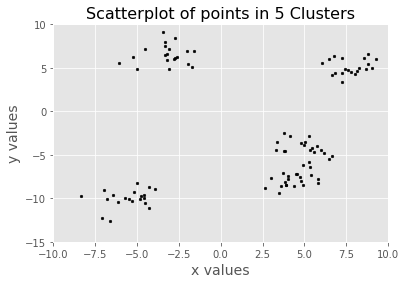

In [26]:
# Getting the values and plotting it

f15 = five_clust[0]
f25 = five_clust[1]
#print(len(f1), f1[:,0])
#print(len(f2), f2)

plt.scatter(f15[:,0], f15[:,1], c='black', s=7)
X2= np.array(list(zip(f15[:,0], f15[:,1])))

plt.xlabel("x values", fontsize=14)
plt.ylabel("y values", fontsize=14)
plt.xlim(-10, 10)
plt.ylim(-15, 10)

plt.title("Scatterplot of points in 5 Clusters", fontsize=16)

plt.show()


Initialize K Centroids

Five Cluster initial Centroids 
 [[0. 2.]
 [4. 6.]
 [5. 4.]
 [2. 4.]
 [0. 3.]]


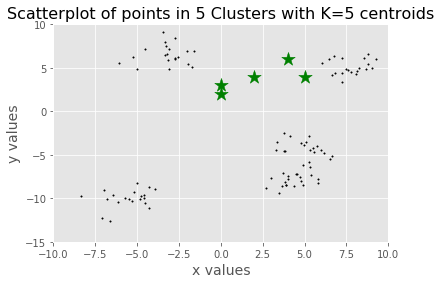

In [28]:
# Number of clusters

k2 = 5
# X coordinates of random centroids
C_x2 = np.random.randint(0, np.max(X2)-2, size=k2)
# Y coordinates of random centroids
C_y2 = np.random.randint(0, np.max(X2)-2, size=k2)
C2 = np.array(list(zip(C_x2, C_y2)),dtype=np.float64)
print("Five Cluster initial Centroids \n",C2)

# Plotting along with the Centroids
plt.scatter(f15[:,0], f15[:,1], c='#050505', s=2)
plt.scatter(C_x2, C_y2, marker='*', s=200, c='g')

plt.xlabel("x values", fontsize=14)
plt.ylabel("y values", fontsize=14)
plt.xlim(-10, 10)
plt.ylim(-15, 10)

plt.title("Scatterplot of points in 5 Clusters with K=5 centroids", fontsize=16)

plt.show()

In [ ]:
# To store the value of centroids when it updates
C2_old = np.zeros(C2.shape)
# Cluster Lables(0, 1)
clusters2 = np.zeros(len(X2))
# Error func. - Distance between new centroids and old centroids
error2 = dist(C2, C2_old, None)
# Loop will run till the error becomes zero
while error2 != 0:
    # Assigning each value to its closest cluster
    print(error2, C2)
    for i in range(len(X2)):
        distances2 = dist(X2[i], C2)
        cluster2 = np.argmin(distances2)
        clusters2[i] = cluster2
    # Storing the old centroid values
    C2_old = deepcopy(C2)
    # Finding the new centroids by taking the average value
    for i in range(k2):
        points2 = [X2[j] for j in range(len(X2)) if clusters2[j] == i]
        C2[i] = np.mean(points2, axis=0)
    error2 = dist(C2, C2_old, None)
    print(error2)
print("Five cluster K-means has Converged")

In [ ]:
print(C2)
print(points2)

In [ ]:
colors2 = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k2):
        points2 = np.array([X2[j] for j in range(len(X2)) if clusters[j] == i])
        #print(points2)
        ax.scatter(points2[:, 0], points2[:, 1], s=7, c=colors2[i])
ax.scatter(C2[:, 0], C2[:, 1], marker='*', s=200, c='#050505')

plt.xlabel("x values", fontsize=14)
plt.ylabel("y values", fontsize=14)
plt.xlim(-10, 10)
plt.ylim(-15, 10)

plt.title("K-means 5 clusters, K=5", fontsize=16)

plt.legend()
plt.show()

### Q1
#### Answer B

**(1) k-means,** 
K-means is a centroid-based clustering algorithm that assigns classes based on the distance of points from one another using a user determined number of clusters.  Randomly initialized (k) points are used as "centers" to assign each data point to a cluster based on distance; the classifier then calculates the centroid of each labeled set of points, creating the new "center". This process repeats until there are not large changes between iterations. 

Advantages and Disadvantages:
K-means is pretty fast because the calculation of distance and group centers is fairly simple; therefore it has linear complexity O(n). However, k-means requires you to select a number of classes ahead of time, which is not always ideal if you are unfamiliar with the structure of the data. The random initialization also means there may be different results for different instances of the same algorithm, resulting in a lack of consistency.


**(2) agglomerative clustering,**
Agglomerative clustering is a bottom-up hierarchical clustering algorithm that treats each data point as a single cluster at the outset and then successively merges (or agglomerates) pairs of clusters until all clusters have been merged into a single cluster that contains all data points. 

Advantages and Disadvantages:
This form of  clustering does not require us to specify the number of clusters, and since we are building a tree, we can "prune" the tree to a number of clusters that fits best. These advantages come at the cost of lower efficiency, as it has a time complexity of O(n³), unlike the linear complexity of K-Means and GMM.

**(3) Gaussian mixture models,**
In gaussian Mixture Models (GMMs) we assume that the data points are Gaussian distributed, allowing the clusters to take any kind of elliptical shape (since we have standard deviation in both the x and y directions). The parameters of the Gaussian for each cluster (e.g the mean and standard deviation) are determined using the optimization algorithm called Expectation–Maximization (EM).

Advantages and Disadvantages:
GMM provides more flexibility than K-Means in terms of cluster covariance, due to the standard deviation parameter. Additionally, GMMs support mixed membership by allowing points to belog to multiple clusters based on a percentage. (eg. If a data point is in the middle of two overlapping clusters, we can simply define its class by saying it belongs X-percent to class 1 and Y-percent to class 2.) 

**(4) DBSCAN,**
DBSCAN is a density based clustering algorithm that creates clusters based on points within a neighborhood of an arbitrarily chosen point, based on density (minPoints the ε distance neighborhood measure). Once a cluster is completely labled, the process repeats with a new arbitrary starting point until all data points have been "visited". If there are not sufficient points to start clustering, those point(s) are labeled as noise and excluded from clusters.

Advantages and Disadvantages:
DBSCAN does not require a pre-set number of clusters, is able to find arbitrarily sized/shaped clusters well, and identifies outliers as noises (unlike k-means, which incorporates them into a cluster even if the data point is very differen). However, DBSCAN  doesn’t perform as well as others when clusters are of varying density; the setting of the distance threshold ε and minPoints for identifying the neighborhood points will vary from cluster to cluster when the density varies. 

**(5) spectral clustering**
Spectral clustering is a graph-based approach that clusters in low dimensional space based on data similarity. Meaning clustered are not determined by location alone, but also focuses instead on connectedness.

Spectral clustering does not make a lot of assumptions about the data, which means the results are likely to be good clusters. However, it is quite slow for large datasets, and requires specifying a number of clusters.

### Q1
#### Answer C

Load data for Answer C:

In [30]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

a = pd.read_csv("./data/Aggregation.txt", sep="\t").values
c = pd.read_csv("./data/Compound.txt",sep="\t").values
d = pd.read_csv("./data/D31.txt",sep="\t").values
j = pd.read_csv("./data/jain.txt",sep="\t").values
print("Files Loaded")
X= []

Files Loaded


In [31]:
print(a.shape)
print(c.shape)
print(d.shape)
print(j.shape)

(787, 3)
(398, 3)
(3099, 3)
(372, 3)


Create Chart Comparison

Automatically created module for IPython interactive environment


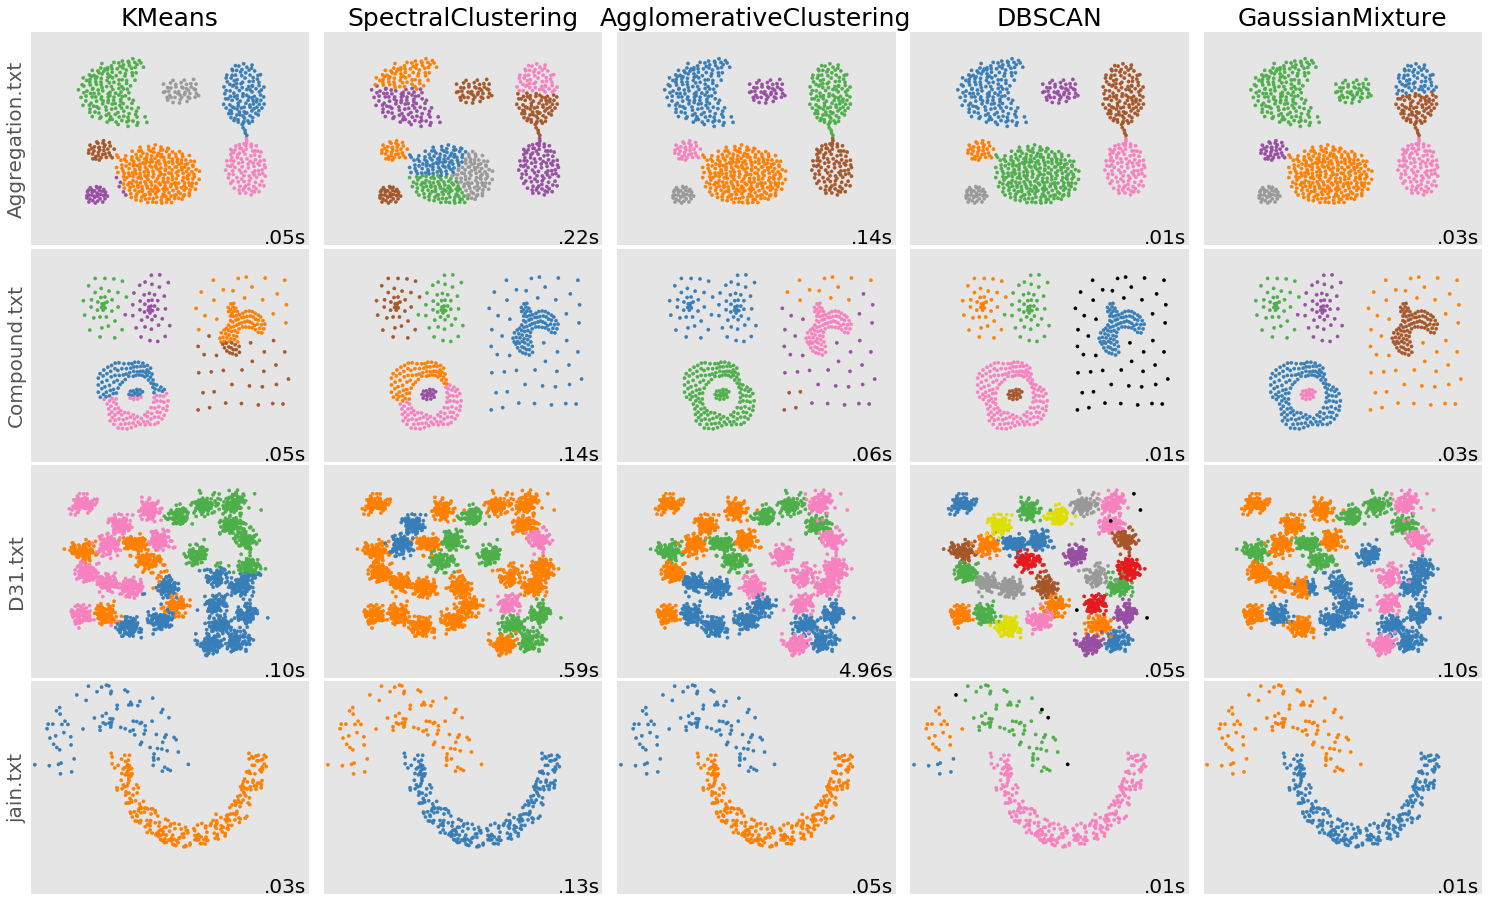

In [32]:
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(26)


# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)


plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 5}
datasets = []
datasets = [
    ("Aggregation.txt", a, {'n_clusters':7}),
    ("Compound.txt",c, {'damping': .77, 'preference': -240,'quantile': .2, 'n_clusters': 6}),
    ("D31.txt",d, {'eps': .18, 'n_neighbors': 2,'n_clusters': 4}),
    ("jain.txt",j, {'damping': .8, 'n_clusters': 2})]

for i_dataset, (dfname,dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)
    dfname = dfname

    X = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('KMeans', two_means),
        ('SpectralClustering', spectral),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=25)
        if name == 'KMeans':
            plt.ylabel(dfname, size=20)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=20,
                 horizontalalignment='right')
        plot_num += 1

plt.show()
warnings.simplefilter('ignore')

Dataset 1: *Aggregation.txt* 

**Best: DBScan**
DBSCan works best because this datset has distinct clusters based on density, with some distance between them.

Worst:Spectral Clustering does not work well because the location is not considered as much of a factor, but is an important characteristic of these data. 

Dataset 2: *Compound.txt* 

**Best: DBScan by Far**
DBScan works best for this dataset because the relative densities very important for the groupings, and because a number of clusters is not needed, it can figure out an ideal number of clusters.

Worst: KMeans is the worst, though the other 3 are also pretty bad, although fast. Kmeans is designed to identify elliptical shapes, and so obscure shapes and those that are nested within one another can not be identified as seperate.

Dataset 3: *D31.txt* 

**Best: Probably SpectralClustering**
The better method depends on the shapes you are trying to get. If you want a sense of connectedness, like the drawing of a line, SpectralClustering is best. If you want each individual blob, you would probably want DBScan.

Worst: Kmeans doesn't add a lot of logical value to clustering, Agglomerative Clustering "works", but is drastically slower.

Dataset 4: *jain.txt* 

**Best:Any but DBScan work well, but SpectralClustering should work the best, and GaussianMixture and KMeans are the fastest** In general, SpectralClustering works best in these kinds of situations. 

Worst: DBScan is the worst, because the density of the one cluster is different than the other, and so it things the first cluster is actually multiple clusters. Kmeans would not perform as well if the clusters were more innertwined.

## 2

### [25 points] Visualizing and clustering digits with PCA and t-SNE

**(a)** Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the resulting 2-dimensional representation of the data.

**(b)** t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/). A video introducing this method can be found [here](https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw) for those who are interested.

*NOTE: An important note on t-SNE is that it is an example of transductive learning. This means that the lower dimensional representation of the data is only applicable to the specific input data - you can't just add a new sample an plot it in the sample 2-dimensional space without entirely rerunning the algorithm and finding a new representation of the data.*

**(c)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? Given the comparative clustering performance that you observed and the note on t-SNE above, what are the pros and cons of PCA and t-SNE? *Note: You typically will not have labels available.*

**ANSWER**

### Q2
#### Answer A, PCA

In [33]:
import warnings
%matplotlib inline

# numbers
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns

# utils
import os, re
from pprint import pprint
print(__doc__)

#learn you some machines
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
# Credits
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
#images_and_labels = list(zip(digits.images, digits.target))
#for index, (image, label) in enumerate(images_and_labels[:4]):
#    plt.subplot(2, 4, index + 1)
#    plt.axis('off')
 #   plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
 #   plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(data.shape)
data = pd.DataFrame(data)
X= data.loc[:,0:63]
y = digits.target

#print(X[:10])
#print(y[:10])

print("Cell has run")
warnings.simplefilter('ignore')

Automatically created module for IPython interactive environment
(1797, 64)
Cell has run


In [34]:
def get_normed_mean_cov(X):
    X_std = StandardScaler().fit_transform(X)
    X_mean = np.mean(X_std, axis=0)
    
    ## Automatic:
    #X_cov = np.cov(X_std.T)
    
    # Manual:
    X_cov = (X_std - X_mean).T.dot((X_std - X_mean)) / (X_std.shape[0]-1)
    
    return X_std, X_mean, X_cov

X_std, X_mean, X_cov = get_normed_mean_cov(data)
X_std_validation, _, _ = get_normed_mean_cov(data)

print("Cell has Run")

Cell has Run


In [35]:
# Make PCA
pca2 = PCA(n_components=2, whiten=True)
pca2.fit(X_std)
X_red = pca2.transform(X_std)
print("Cell Has Run")

Cell Has Run


In [36]:
# Make SVC
linclass2 = SVC()
linclass2.fit(X_red,y)
print("Cell Has Run")

Cell Has Run


In [37]:
# To color each point by the digit it represents,
# create a color map with 10 elements (10 RGB values).
# Then, use the system response (y_training), which conveniently
# is a digit from 0 to 9.
def get_cmap(n):
    #colorz = plt.cm.cool
    colorz = plt.get_cmap('Set1')
    return [ colorz(float(i)/n) for i in range(n)]

colorz = get_cmap(10)
colors = [colorz[yy] for yy in y]
print("Cell has run")

Cell has run


In [38]:
X_red= pd.DataFrame(X_red)
X_red["label"] = y
X_red = np.array(X_red)

Still struggling with legends in matplotlib for colors......

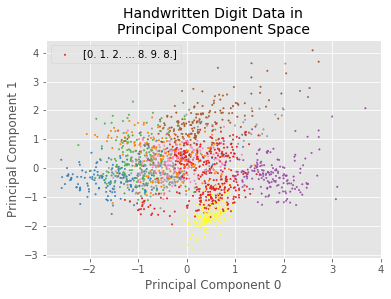

In [39]:
scatter(X_red[:,0], X_red[:,1], 
        color=colors, marker='o', s=2, label= X_red[:,2])
xlabel("Principal Component 0")
ylabel("Principal Component 1")
title("Handwritten Digit Data in\nPrincipal Component Space",size=14)
legend()
show()

### Q2
#### Answer B, t-SNE

Automatically created module for IPython interactive environment
Computing PCA projection
Computing t-SNE embedding


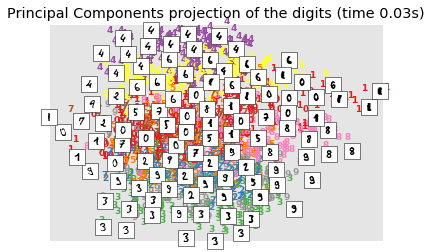

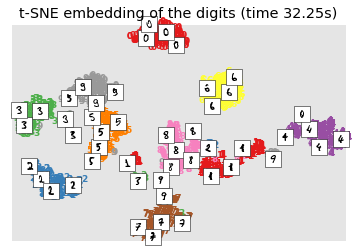

In [40]:
# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)


n_samples, n_features = X.shape
n_neighbors = 30


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)



#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()


### Q2
#### Answer C, PCA, t-SNE comparison

The t-SNE is a much more legible clustering of the digits in 2 dimensional space. Without the labels, it would be difficult to tease apart the groupings of digits from the clustering of PCA. With the t-SNE, each of the different groupings have a much more distinguishable distance between them. However, t-SNE does take much more time/computaional power than PCA.

## 3

### [30 points] PCA for compression

From the digits dataset, extract all the 5's. Your going to create a compressed version of one of an image.

**(a)** Plot a number of examples of the original images.

**(b)** Perform PCA on the data. Create a plot showing the fraction of variance explained as you incorporate from $1$ to $N$ components. 

**(c)** Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Plot the original image, and compressed versions with different levels of compression (i.e. using different numbers of the top principal components): use $k=1,5,10,25$.

**(d)** How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.

### Q3
#### Part A, Extract 5s

In [41]:
digits = datasets.load_digits()


n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(data.shape)
data = pd.DataFrame(data)
X= data.loc[:,0:63]
y = digits.target

#print(X[:10])
#print(y[:10])


(1797, 64)


182


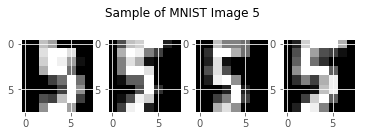

In [42]:
ids = np.where(digits.target==5)[0] 
print(len(ids))
X= np.array(X)
y= np.array(y)
X_5 = X[ids]
y_5 = y[ids]

# (a) Plot a number of examples of the original images.
plt.figure(figsize=(6,2))
plt.suptitle("Sample of MNIST Image 5")
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(X_5[i].reshape(8,8),cmap='gray')
    pass
plt.show()

### Q3
#### Part B, PCA of 5s

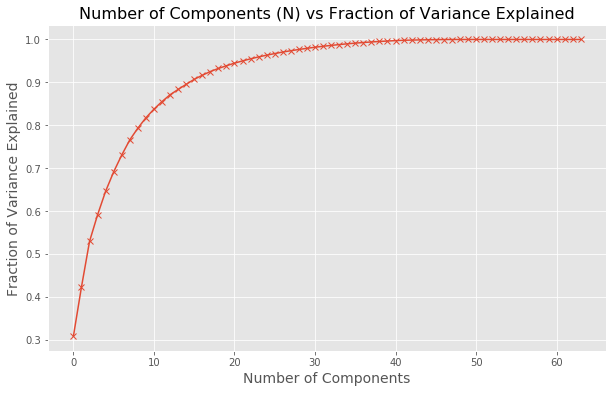

In [43]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

N = 64
var_explained = []
for n in range(1,N+1):
    pca = PCA(n)  # project from 64 to 2 dimensions
    projected = pca.fit_transform(X_5)
    var_explained.append(sum(pca.explained_variance_ratio_))
    pass

plt.figure(figsize=(10,6))
plt.plot(np.arange(N),np.array(var_explained),'-x')
plt.title("Number of Components (N) vs Fraction of Variance Explained", fontsize=16)
plt.xlabel("Number of Components",fontsize=14)
plt.ylabel("Fraction of Variance Explained", fontsize=14)
plt.show()


### Q3
#### Part C, Image Compression

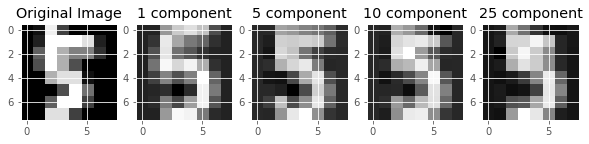

In [44]:
k = [1,5,10,25]
plt.figure(figsize=(10,6))
plt.subplot(1,5,1)
plt.imshow(X_5[6].reshape(8,8),cmap='gray')
plt.title("Original Image")
for i in range(len(k)):
    pca = PCA(k[i])
    pcaComps = pca.fit(X_5).transform(X_5)
    xCompressed = pca.inverse_transform(pcaComps)
    plt.subplot(1,5,i+2)
    plt.imshow(xCompressed[0].reshape(8,8),cmap='gray')
    plt.title("{} component".format(k[i]))

plt.show()

### Q3
#### Part D, Compression Comments

d) How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of  𝑘
k
  to the original dimension of the data  𝐷
D
 , so it ranges from  0
0
  to  1
1
 ). Comment on each case.

In [45]:
print((1-1/64),(1-5/64),(1-10/64),(1-25/64))

0.984375 0.921875 0.84375 0.609375


From the visuals, it appears that at least 10 components are necessary to distinguish the character 5. 

At 1 component, the compression is 98.4%; there is a clear 5, with space between the defining features for the utmost clarity.

At 5 components, the compression is 92.2%; the five is pretty solidly clear here with out as much doubt.

At 10 components, the compression is 84.3%; this would be when I would first say a five has appeared, but there would be some doubt in the top of the number, which could indicate a circle rather than the top "c" of a 5.

At 25 components, the compression is 60.9%; the top of the five is indistinguishable from other characters such as a 3 or 9.




## 4

### [15 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

**(b)** Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve.

**(c)** Suggest at least two ways in which you neural network implementation could be improved.

**ANSWER**